In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Analysis of premier league season 2018/2019

In [2]:
pld = pd.read_csv('season-1819_csv.csv')
pld

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15


In [3]:
pld.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,4.170000,24.000000,2.500000,3.150000,3.010000,2.770000,2.650000,24.770000,14.920000,36.050000


In [4]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 62 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA       

In [5]:
pld.columns[0:10]

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR'],
      dtype='object')

Showing the total number of goals scored by the teams in all of their 38 matchday weeks

In [6]:
def get_goals_scored(stat):
    # Create a dictionary with team names as keys
    teams = {}
    teams1 = {}
    for i in stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(stat)):
        HGS = stat.iloc[i]['FTHG']
        AGS = stat.iloc[i]['FTAG']
        teams[stat.iloc[i].HomeTeam].append(HGS)
        teams[stat.iloc[i].AwayTeam].append(AGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored.sort_values(38,ascending=False)


df = get_goals_scored(pld)
goals = pd.DataFrame(df)
goals

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,0
Man City,2,8,9,11,14,19,21,21,26,27,...,79,81,83,86,87,89,90,91,95,0
Liverpool,4,6,7,9,11,14,15,15,16,20,...,68,70,72,75,77,79,84,87,89,0
Arsenal,0,2,5,8,10,12,14,19,22,24,...,63,65,65,66,68,69,69,70,73,0
Tottenham,2,5,8,9,10,12,14,15,16,16,...,57,58,60,64,64,65,65,65,67,0
Man United,2,4,4,6,8,9,10,13,15,17,...,58,60,61,63,63,63,64,65,65,0
Chelsea,3,6,8,10,14,14,15,18,20,24,...,50,52,55,57,57,59,60,63,63,0
Bournemouth,2,4,6,6,10,10,12,16,16,19,...,41,43,43,44,49,49,52,53,56,0
Everton,2,4,6,7,8,8,11,13,15,16,...,41,43,45,46,46,50,50,52,54,0
West Ham,0,1,2,2,5,5,8,8,8,9,...,37,41,41,41,42,44,45,48,52,0
Watford,2,5,7,9,10,11,11,11,13,16,...,42,43,47,47,49,50,51,51,52,0


Here As we can see that Manchester City is the team that scored the most goals in the 2018/19 season.
And Huddersfield scored the least number of goals.

In [25]:
import plotly.express as px
i = goals.index
px.bar(goals, x=i, y=goals[-1])

KeyError: -1

# Results of  Matches where the home team scored the highest goals in a game

In [8]:
pld.groupby('HomeTeam').max()

,Div,Date,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
HomeTeam,,,,,,,,,,,,,,,,,,,,,
Arsenal,E0,29/09/2018,Wolves,5,3,H,2,2,H,S Attwell,...,2.90,24,0.75,2.35,2.21,2.32,2.25,4.43,7.15,15.42
Bournemouth,E0,30/01/2019,Wolves,4,4,H,3,3,H,S Hooper,...,2.97,23,2.00,2.40,2.23,2.64,2.55,14.56,8.68,5.65
Brighton,E0,30/03/2019,Wolves,3,5,H,3,2,H,S Hooper,...,2.86,23,2.50,3.15,3.01,2.54,2.44,13.17,7.24,5.83
Burnley,E0,30/12/2018,Wolves,4,5,H,2,3,H,S Attwell,...,2.88,22,2.00,2.90,2.74,2.40,2.31,18.20,9.44,4.76
Cardiff,E0,31/03/2019,Wolves,4,5,H,2,3,H,S Hooper,...,2.70,23,2.00,2.47,2.36,2.42,2.31,21.63,8.65,4.00
Chelsea,E0,29/09/2018,Wolves,5,2,H,2,2,H,P Tierney,...,3.18,24,0.75,2.33,2.27,2.37,2.29,3.56,8.85,23.00
Crystal Palace,E0,30/12/2018,Wolves,5,3,H,3,1,H,R East,...,2.45,23,1.50,2.61,2.52,2.47,2.37,13.30,7.06,8.32
Everton,E0,29/09/2018,Wolves,4,6,H,2,3,H,S Attwell,...,2.61,24,1.50,2.51,2.39,2.34,2.25,9.95,6.15,8.88
Fulham,E0,30/03/2019,Wolves,4,5,H,3,2,H,P Tierney,...,3.55,22,2.50,2.29,2.23,2.37,2.30,18.37,12.03,4.33


In [9]:
pld.groupby('AwayTeam').max()

,Div,Date,HomeTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
AwayTeam,,,,,,,,,,,,,,,,,,,,,
Arsenal,E0,29/12/2018,Wolves,5,5,H,4,2,H,S Attwell,...,3.19,23,1.00,2.45,2.31,2.38,2.32,6.34,7.19,10.35
Bournemouth,E0,30/12/2018,Wolves,5,5,H,3,3,H,S Hooper,...,3.86,24,0.25,2.61,2.52,2.32,2.25,3.43,9.87,22.77
Brighton,E0,29/09/2018,Wolves,4,2,H,2,2,H,P Tierney,...,3.44,22,0.25,2.91,2.83,2.40,2.31,2.98,11.74,28.42
Burnley,E0,30/09/2018,Wolves,5,3,H,3,2,H,S Attwell,...,3.66,24,-0.25,2.50,2.40,2.32,2.24,2.50,14.92,32.36
Cardiff,E0,29/12/2018,Wolves,4,2,H,2,1,H,S Hooper,...,4.15,24,0.00,3.15,3.01,2.35,2.28,2.46,14.62,28.98
Chelsea,E0,31/03/2019,Wolves,6,4,H,4,2,H,S Attwell,...,2.37,23,1.50,2.45,2.38,2.49,2.41,9.53,4.85,6.44
Crystal Palace,E0,30/01/2019,Wolves,4,4,H,3,2,H,S Attwell,...,3.18,23,0.25,2.23,2.16,2.42,2.31,3.47,7.90,19.72
Everton,E0,30/03/2019,Wolves,3,5,H,1,3,H,S Attwell,...,2.98,23,0.75,2.41,2.35,2.54,2.45,4.88,6.83,13.15
Fulham,E0,29/09/2018,Wolves,4,2,H,3,2,H,S Attwell,...,3.96,23,-0.25,2.77,2.67,2.30,2.21,2.62,12.75,26.16


In [10]:
pld.groupby('FTHG').max()

,Div,Date,HomeTeam,AwayTeam,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
FTHG,,,,,,,,,,,,,,,,,,,,,
0,E0,30/12/2018,Wolves,Wolves,5,D,0,3,D,S Hooper,...,3.55,23,2.5,3.15,3.01,2.54,2.45,24.77,12.03,12.48
1,E0,31/03/2019,Wolves,Wolves,5,H,1,3,H,S Hooper,...,3.42,24,2.5,2.70,2.54,2.77,2.65,13.30,11.44,22.00
2,E0,31/03/2019,Wolves,Wolves,6,H,2,3,H,S Hooper,...,4.15,24,2.0,2.91,2.83,2.49,2.41,15.43,14.62,29.28
3,E0,29/09/2018,Wolves,Wolves,3,H,3,3,H,S Attwell,...,3.86,23,1.0,2.77,2.67,2.60,2.44,5.90,12.75,25.00
4,E0,30/12/2018,Wolves,West Ham,3,H,3,2,H,S Attwell,...,3.09,24,1.0,2.40,2.35,2.32,2.22,5.71,9.84,28.98
5,E0,29/12/2018,Tottenham,Watford,3,H,4,1,H,R East,...,4.17,23,-1.0,2.61,2.52,2.32,2.25,1.79,14.92,34.97
6,E0,19/08/2018,Man City,Southampton,1,H,4,1,H,M Dean,...,3.45,22,-1.0,2.31,2.24,2.13,2.06,1.58,13.93,36.05


In [11]:
pl = pd.DataFrame(pld.iloc[:,0:10])
pl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A
...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H


In [12]:
pl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A
...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H


In [13]:
pl.groupby('AwayTeam').mean()

,FTHG,FTAG,HTHG,HTAG
AwayTeam,,,,
Arsenal,1.842105,1.631579,1.052632,0.736842
Bournemouth,2.368421,1.368421,1.210526,0.684211
Brighton,1.684211,0.842105,0.736842,0.368421
Burnley,1.894737,1.105263,0.894737,0.526316
Cardiff,1.631579,0.684211,0.631579,0.157895
Chelsea,1.421053,1.263158,0.578947,0.578947
Crystal Palace,1.578947,1.684211,0.368421,0.631579
Everton,1.315789,1.263158,0.315789,0.578947
Fulham,2.368421,0.631579,1.105263,0.315789


In [14]:
print('Team which scored highest home goals is: ', pl['HomeTeam'].max())
pl.loc[pl['FTHG'].idxmax(), ['HomeTeam','AwayTeam','FTHG','FTAG']]

Team which scored highest home goals is:  Wolves


HomeTeam        Man City
AwayTeam    Huddersfield
FTHG                   6
FTAG                   1
Name: 18, dtype: object

In [15]:
print('Team which scored highest away goals is: ', pl['AwayTeam'].max())
pl.loc[pl['FTAG'].idxmax(), ['AwayTeam','HomeTeam','FTAG','FTHG']]

Team which scored highest away goals is:  Wolves


AwayTeam    Tottenham
HomeTeam      Everton
FTAG                6
FTHG                2
Name: 179, dtype: object

# Total Goals scored by Home Teams

In [16]:
x = pl['FTHG'].sum()
x

596

# Total Goals scored by Away Teams 

In [17]:
y = pl['FTAG'].sum()
y

476

In [18]:
pl.groupby(['HomeTeam','FTHG']).idxmax()

FTAG  HTHG  HTAG
HomeTeam FTHG                  
Arsenal  0        7     7     7
         1      100   366   116
         2      342   220   342
         3       20    20    20
         4      137   137   137
...             ...   ...   ...
Wolves   0       87    87    87
         1       25    25    25
         2      106   285   106
         3      349   349   235
         4      227   227   227

[94 rows x 3 columns]

In [19]:
pl.groupby(['AwayTeam','FTAG']).count()

Div  Date  HomeTeam  FTHG  FTR  HTHG  HTAG  HTR
AwayTeam FTAG                                                 
Arsenal  0       3     3         3     3    3     3     3    3
         1       6     6         6     6    6     6     6    6
         2       7     7         7     7    7     7     7    7
         3       2     2         2     2    2     2     2    2
         5       1     1         1     1    1     1     1    1
...            ...   ...       ...   ...  ...   ...   ...  ...
West Ham 4       1     1         1     1    1     1     1    1
Wolves   0       6     6         6     6    6     6     6    6
         1       9     9         9     9    9     9     9    9
         2       2     2         2     2    2     2     2    2
         3       2     2         2     2    2     2     2    2

[91 rows x 8 columns]

In [20]:
print(pl.groupby(pl['HomeTeam']=='Wolves').max())

         Div        Date  HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR
HomeTeam                                                                    
False     E0  31/03/2019  West Ham    Wolves     6     6   H     4     3   H
True      E0  29/09/2018    Wolves  West Ham     4     3   H     3     2   H


# Total goals scored in the season is:

In [21]:
print('Total goals scored in the season are: ',x + y)

Total goals scored in the season are:  1072


In [37]:
u = pl['FTHG'].value_counts().unique
u

<bound method Series.unique of 1    116
2     95
0     88
3     48
4     22
5      8
6      3
Name: FTHG, dtype: int64>

Text(0, 0.5, 'Total occurences')

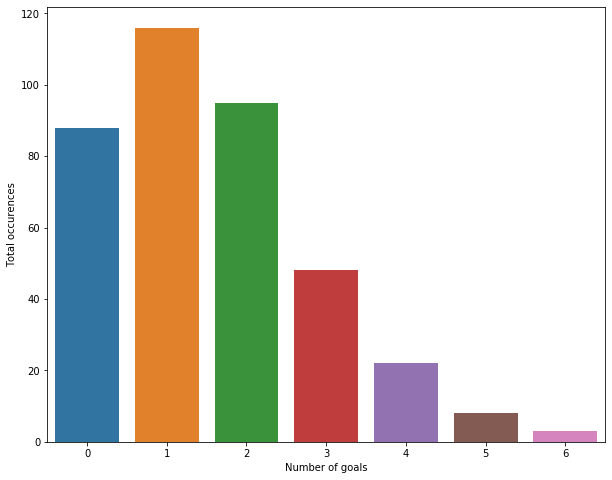

In [40]:
fig = plt.figure(figsize=(10,8))
sns.countplot(pl['FTHG'], data=pl)
plt.xlabel('Number of goals')
plt.ylabel('Total occurences')

Text(0, 0.5, 'Total occurences')

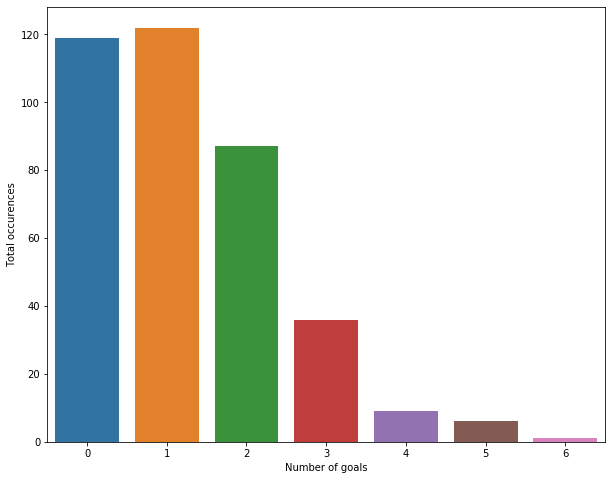

In [41]:
fig = plt.figure(figsize=(10,8))
sns.countplot(pl['FTAG'], data=pl)
plt.xlabel('Number of goals')
plt.ylabel('Total occurences')

In [42]:
goals

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,0
Man City,2,8,9,11,14,19,21,21,26,27,...,79,81,83,86,87,89,90,91,95,0
Liverpool,4,6,7,9,11,14,15,15,16,20,...,68,70,72,75,77,79,84,87,89,0
Arsenal,0,2,5,8,10,12,14,19,22,24,...,63,65,65,66,68,69,69,70,73,0
Tottenham,2,5,8,9,10,12,14,15,16,16,...,57,58,60,64,64,65,65,65,67,0
Man United,2,4,4,6,8,9,10,13,15,17,...,58,60,61,63,63,63,64,65,65,0
Chelsea,3,6,8,10,14,14,15,18,20,24,...,50,52,55,57,57,59,60,63,63,0
Bournemouth,2,4,6,6,10,10,12,16,16,19,...,41,43,43,44,49,49,52,53,56,0
Everton,2,4,6,7,8,8,11,13,15,16,...,41,43,45,46,46,50,50,52,54,0
West Ham,0,1,2,2,5,5,8,8,8,9,...,37,41,41,41,42,44,45,48,52,0
Watford,2,5,7,9,10,11,11,11,13,16,...,42,43,47,47,49,50,51,51,52,0


In [45]:
goals.to_csv(index=False)

'1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,0\r\n2,8,9,11,14,19,21,21,26,27,33,36,40,43,45,45,48,50,51,54,56,59,62,63,66,68,74,75,76,79,81,83,86,87,89,90,91,95,0\r\n4,6,7,9,11,14,15,15,16,20,21,23,26,27,30,34,37,39,43,48,49,50,54,55,56,59,59,64,64,68,70,72,75,77,79,84,87,89,0\r\n0,2,5,8,10,12,14,19,22,24,25,26,28,32,34,35,37,40,41,42,46,46,48,50,51,53,55,60,61,63,65,65,66,68,69,69,70,73,0\r\n2,5,8,9,10,12,14,15,16,16,19,20,23,25,28,30,31,37,42,43,46,46,48,50,51,54,55,55,56,57,58,60,64,64,65,65,65,67,0\r\n2,4,4,6,8,9,10,13,15,17,19,20,20,22,24,28,29,34,37,41,43,44,46,48,49,52,52,55,58,58,60,61,63,63,63,64,65,65,0\r\n3,6,8,10,14,14,15,18,20,24,27,27,28,30,31,33,35,35,37,38,38,40,40,40,45,45,47,49,50,50,52,55,57,57,59,60,63,63,0\r\n2,4,6,6,10,10,12,16,16,19,20,21,22,23,25,25,25,27,27,28,31,31,33,37,37,37,38,39,39,41,43,43,44,49,49,52,53,56,0\r\n2,4,6,7,8,8,11,13,15,16,19,19,20,20,21,23,24,26,31,31,31,33,34,35,36,36,36,39,39,41,

In [46]:
goals

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,0
Man City,2,8,9,11,14,19,21,21,26,27,...,79,81,83,86,87,89,90,91,95,0
Liverpool,4,6,7,9,11,14,15,15,16,20,...,68,70,72,75,77,79,84,87,89,0
Arsenal,0,2,5,8,10,12,14,19,22,24,...,63,65,65,66,68,69,69,70,73,0
Tottenham,2,5,8,9,10,12,14,15,16,16,...,57,58,60,64,64,65,65,65,67,0
Man United,2,4,4,6,8,9,10,13,15,17,...,58,60,61,63,63,63,64,65,65,0
Chelsea,3,6,8,10,14,14,15,18,20,24,...,50,52,55,57,57,59,60,63,63,0
Bournemouth,2,4,6,6,10,10,12,16,16,19,...,41,43,43,44,49,49,52,53,56,0
Everton,2,4,6,7,8,8,11,13,15,16,...,41,43,45,46,46,50,50,52,54,0
West Ham,0,1,2,2,5,5,8,8,8,9,...,37,41,41,41,42,44,45,48,52,0
Watford,2,5,7,9,10,11,11,11,13,16,...,42,43,47,47,49,50,51,51,52,0


In [49]:
t = goals.index

In [50]:
t

Index(['Man City', 'Liverpool', 'Arsenal', 'Tottenham', 'Man United',
       'Chelsea', 'Bournemouth', 'Everton', 'West Ham', 'Watford', 'Leicester',
       'Crystal Palace', 'Wolves', 'Southampton', 'Burnley', 'Newcastle',
       'Brighton', 'Fulham', 'Cardiff', 'Huddersfield'],
      dtype='object')

Text(0, 0.5, 'Total goals')

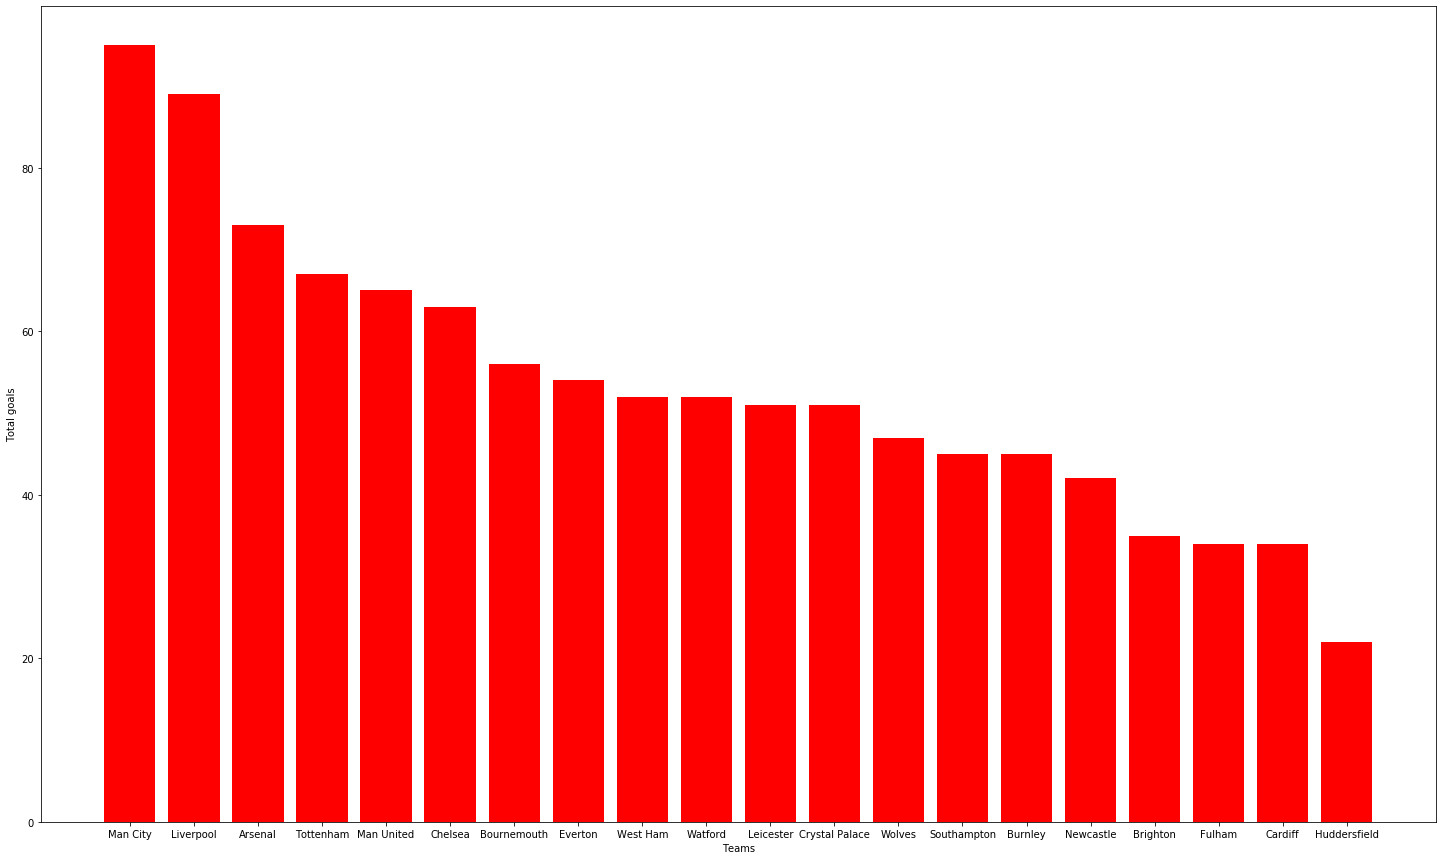

In [58]:
fig = plt.figure(figsize=(25,15))
plt.bar(t, goals[38], color='Red')
plt.xlabel('Teams')
plt.ylabel('Total goals')